In [1]:
import xarray as xr
import argopy
import os
import glob
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import numpy as np


In [2]:
rep_data_argo = '/Volumes/argo/gdac/dac/coriolis/'
num_float = '6902802'
rep_CK = '../fic_netcdf_test/6902802_202512051504/nc/'
val_bid = os.path.join(rep_data_argo,num_float,'profiles','B?' +num_float + '_???.nc')
fic_argo = glob.glob(val_bid)
fic_argo.sort()
print(len(fic_argo))


158


In [8]:
for i_fic in range(0,1): #len(fic_argo)):
    fic_en_cours = fic_argo[i_fic]
    ds = xr.open_dataset(fic_en_cours,engine='argo')
    fic_CK = os.path.join(rep_CK,os.path.basename(fic_en_cours))
    ds_CK = xr.open_dataset(fic_CK,engine='argo')
    diff_cal = np.abs(ds['DOXY_ADJUSTED']-ds_CK['DOXY_ADJUSTED'])
    print(f"{fic_en_cours} : max_diff : {float(np.max(diff_cal)):.6f}")
    ds.close()
    ds_CK.close()

/Volumes/argo/gdac/dac/coriolis/6902802/profiles/BD6902802_001.nc : max_diff : 0.000000


/Volumes/argo/gdac/dac/coriolis/6902802/profiles/BD6902802_044.nc


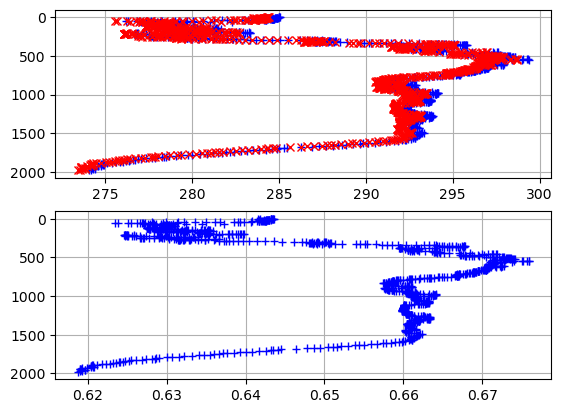

In [ ]:
for i_fic in range(0,len(fic_argo)):
    fic_en_cours = fic_argo[i_fic]
    print(fic_en_cours)

    ds = xr.open_dataset(fic_en_cours,engine='argo')
    fic_CK = os.path.join(rep_CK,os.path.basename(fic_en_cours))
    ds_CK = xr.open_dataset(fic_CK,engine='argo')
    fig = plt.figure()
    plt.subplot(2,1,1)
    _=plt.plot(ds['DOXY_ADJUSTED'],ds['PRES'],'+-b')
    _=plt.plot(ds_CK['DOXY_ADJUSTED'],ds_CK['PRES'],'x-r')
    plt.grid()
    plt.gca().invert_yaxis()
    plt.subplot(2,1,2)
    _=plt.plot(ds['DOXY_ADJUSTED']-ds_CK['DOXY_ADJUSTED'],ds['PRES'],'+-b')
    plt.grid()
    plt.gca().invert_yaxis()
    plt.show()
    input(f"Appuie sur Enter pour passer au fichier suivant...")
    clear_output(wait=True)   
    plt.close(fig)
    ds.close()
    ds_CK.close()